## Representation empirique

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

data = pd.read_csv('../datas/operations.csv')

data['date_operation'] = pd.to_datetime(data['date_operation'])
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']
    data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'
    data.drop_duplicates(subset=['date_operation', 'libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)
    data.loc[data['montant']==-15000, 'montant'] = -14.39
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


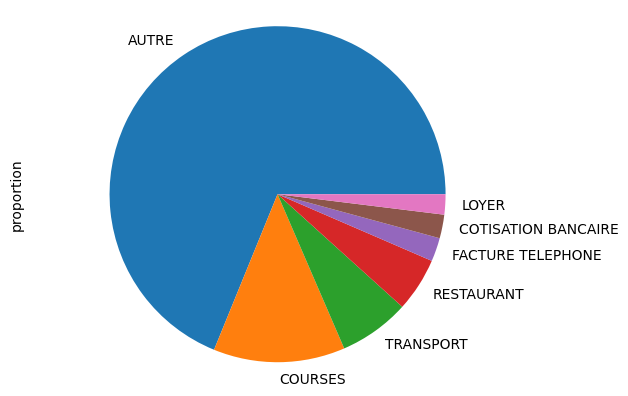

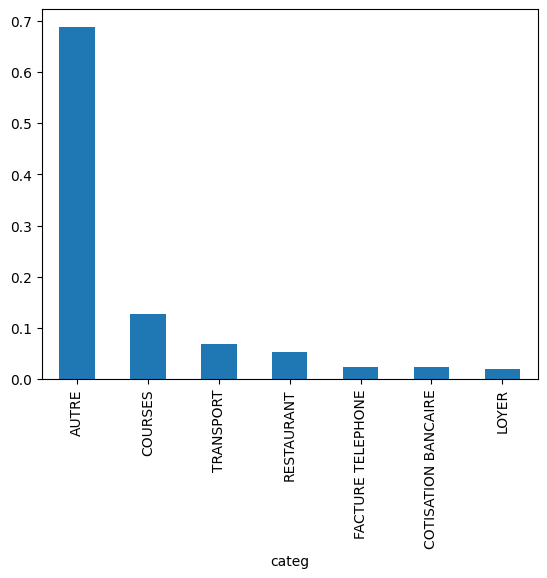

In [3]:
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()